<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Z-stack-images" data-toc-modified-id="Z-stack-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Z-stack images</a></span><ul class="toc-item"><li><span><a href="#Load-image" data-toc-modified-id="Load-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load image</a></span></li><li><span><a href="#Plot-GFP-profiles-vs-x" data-toc-modified-id="Plot-GFP-profiles-vs-x-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot GFP profiles vs x</a></span><ul class="toc-item"><li><span><a href="#Average-over-y-over-non-black-pixels" data-toc-modified-id="Average-over-y-over-non-black-pixels-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Average over y over non-black pixels</a></span></li><li><span><a href="#Entire-z-stacks-together" data-toc-modified-id="Entire-z-stacks-together-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Entire z-stacks together</a></span></li><li><span><a href="#Individual-images-(fix-z)" data-toc-modified-id="Individual-images-(fix-z)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Individual images (fix z)</a></span></li></ul></li><li><span><a href="#Plot-GFP-profiles-vs-z" data-toc-modified-id="Plot-GFP-profiles-vs-z-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot GFP profiles vs z</a></span></li></ul></li><li><span><a href="#Max-projection" data-toc-modified-id="Max-projection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Max projection</a></span><ul class="toc-item"><li><span><a href="#Roughness" data-toc-modified-id="Roughness-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Roughness</a></span><ul class="toc-item"><li><span><a href="#Load-interface-as-saved-ROI-(not-useful)" data-toc-modified-id="Load-interface-as-saved-ROI-(not-useful)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Load interface as saved ROI (not useful)</a></span></li><li><span><a href="#Load-interface-as-binary-picture" data-toc-modified-id="Load-interface-as-binary-picture-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Load interface as binary picture</a></span></li><li><span><a href="#Calculate-roughness" data-toc-modified-id="Calculate-roughness-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Calculate roughness</a></span></li><li><span><a href="#Fit-linear-model-on-log-log-data" data-toc-modified-id="Fit-linear-model-on-log-log-data-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Fit linear model on log-log data</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg


In [2]:
# Image settings
pix_per_micron = 2.53; # number of pixels per micron
Lx = 1447/pix_per_micron;
Ly = 1447/pix_per_micron; 
Lz = 167.5; # height in microns

# Z-stack images

## Load image

In [5]:
from skimage import io

image_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_BAPN/PHD_Tabler_BAPN_E140_DAPI_osx_phal647_GFP_rotated.tif"

# Load image
img = io.imread(image_to_load)

In [6]:
# using napari
import napari

# create the viewer and add the coins image
viewer = napari.view_image(img, name='image')

In [7]:
# Using skimage viewer
from skimage import viewer
vw = viewer.ImageViewer(img[30]) 
vw.show()

/Users/dang/opt/miniconda3/envs2/image_analysis/lib/python3.10/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_16899/1325187768.py:3: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  vw = viewer.ImageViewer(img[30])


[]

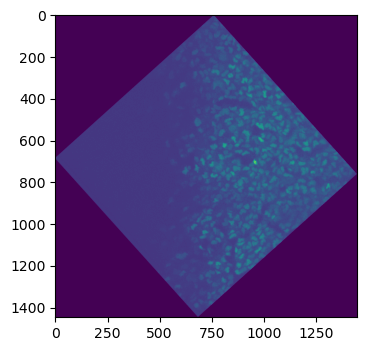

In [8]:
# Using matplotlib imshow
plt.figure(dpi=100)
plt.imshow( img[30] )
plt.show()

## Plot GFP profiles vs x

### Average over y over non-black pixels

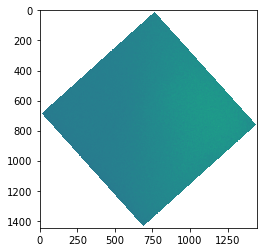

In [9]:
# try for single image
tmp=img[0].copy().astype(float)
tmp[tmp==0] = np.ones( np.sum(tmp==0) )*np.nan # set all 0's to NaN

plt.imshow(tmp)

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_16899/1280981440.py:2: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(tmp, axis=0)


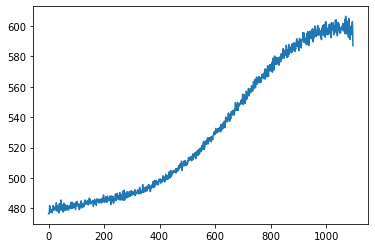

In [10]:
xrange = [150, -200]
avg = np.nanmean(tmp, axis=0)

plt.plot(avg[xrange[0]:xrange[1]])

In [11]:
# Process entire stack
vals_stack = np.zeros([img.shape[0], img.shape[2]]);

for i in range(img.shape[0]):
    tmp=img[i].copy().astype(float)
    tmp[tmp==0] = np.ones( np.sum(tmp==0) )*np.nan # set all 0's to NaN
    avg = np.nanmean(tmp, axis=0);
    vals_stack[i, :] = avg

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_16899/1571253865.py:7: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(tmp, axis=0);


### Entire z-stacks together

In [15]:
# Trim data
xrange = [150, -200]
zrange = [0, 70]
nslices = zrange[1] - zrange[0]
ndatapoints = img[0].shape[0] + xrange[1] - xrange[0] 
intensity_trimmed = vals_stack[zrange[0]:zrange[1], xrange[0]:xrange[1] ];

/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_16899/4268772705.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


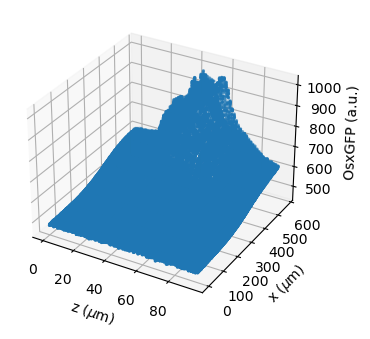

In [28]:
x_vals = np.linspace(xrange[0], img.shape[1]+xrange[1], nslices)*Lx/img.shape[1]
z_vals = np.linspace(zrange[0], zrange[1], nslices)*Lz/img.shape[0]

slice_vals = np.tile(z_vals, (ndatapoints, 1)).T; # values of each slice
x_vals_plot = np.tile( x_vals, (nslices, 1)) ; # values along perpendicular axis
#z_vals = np.linspace(0, Lz, nslices)

# Plot results
fig = plt.figure(figsize=(6, 4), dpi=100)
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
ax.scatter(slice_vals, x_vals_plot, intensity_trimmed, s=2)
ax.set_xlabel('z ($\mu$m)')
ax.set_ylabel('x ($\mu$m)')
ax.set_zlabel('OsxGFP (a.u.)');

# save figure
folder_out = "/Users/dang/Documents/Projects/Tabler_skull/Figures/Fixed_tissue_compare_WT_BAPN/"
fname_out = "PHD_Tabler_BAPN_E140_DAPI_osx_phal647_GFP_rotated_z-stack_GFP.png";

plt.savefig(folder_out+fname_out)

plt.show()

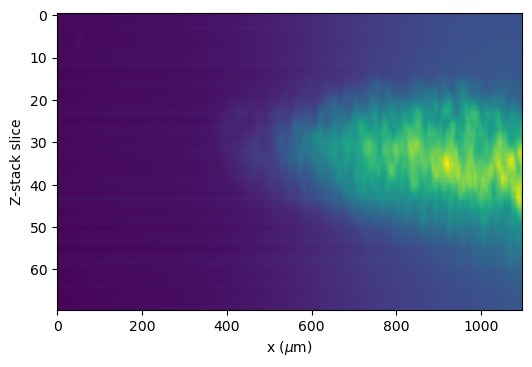

In [21]:
fig, ax = plt.subplots(dpi=100)

x_vals, slice_vals, 
ax.imshow(intensity_trimmed, aspect=10)
ax.set_ylabel('Z-stack slice')
ax.set_xlabel('x ($\mu$m)')
plt.show()

### Individual images (fix z)

Text(0, 0.5, 'Normalized Osx1-GFP (a.u.)')

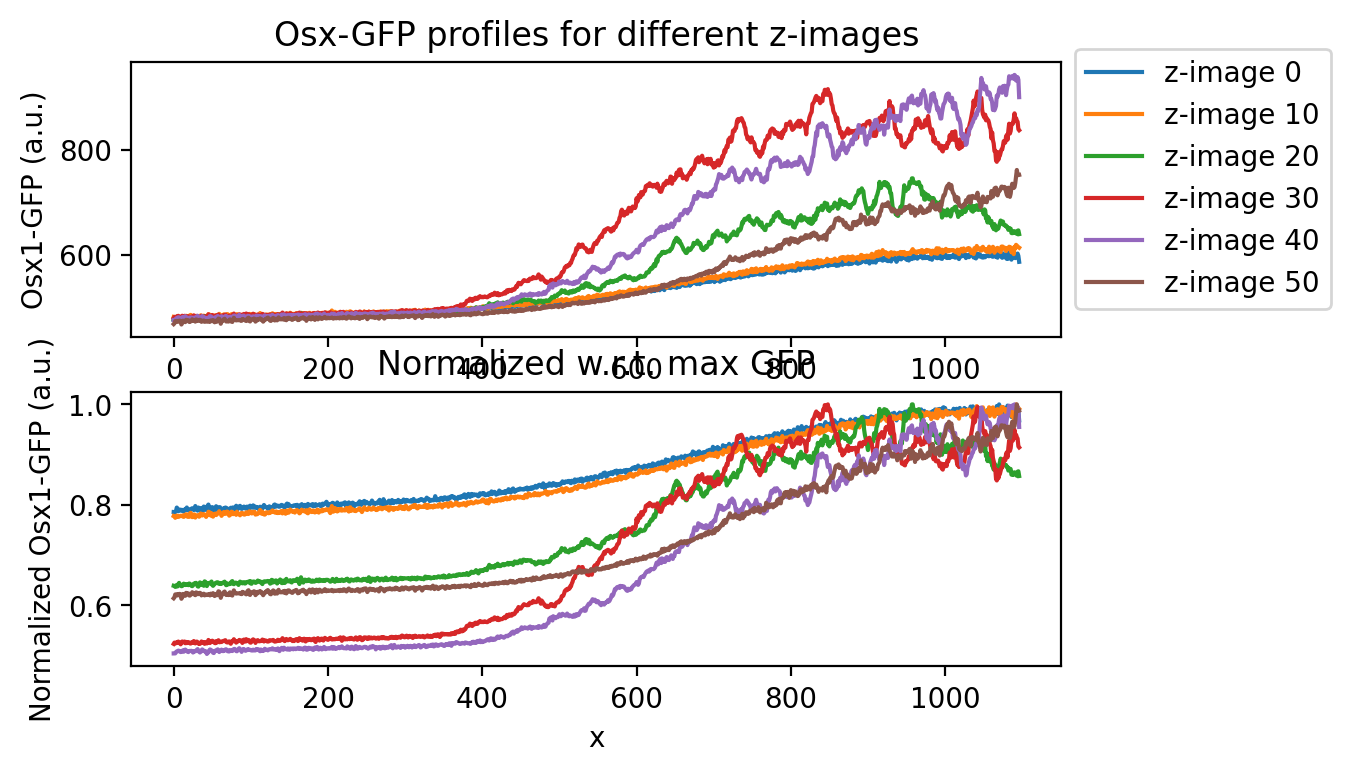

In [79]:
fig_x_profiles = plt.figure(dpi=200);
x_range = np.arange(0, nslices, 10);

plt.subplot(2, 1, 1)
plt.title('Osx-GFP profiles for different z-images')
for i in x_range:
    #plt.plot(intensity_trimmed[i, :], label='z-image '+str(i))
    plt.plot(intensity_trimmed[i, :], label='z-image '+str(i))
plt.xlabel('x')
plt.ylabel('Osx1-GFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))
    
plt.subplot(2, 1, 2)
plt.title('Normalized w.r.t. max GFP')
for i in x_range:
    plt.plot(intensity_trimmed[i, :]/max(intensity_trimmed[i, :]), label='z-image '+str(i))

plt.xlabel('x')
plt.ylabel('Normalized Osx1-GFP (a.u.)')
#plt.legend(bbox_to_anchor=(1, 1.1))

#plt.tight_layout()

Text(0, 0.5, 'Osx1-GFP (a.u.)')

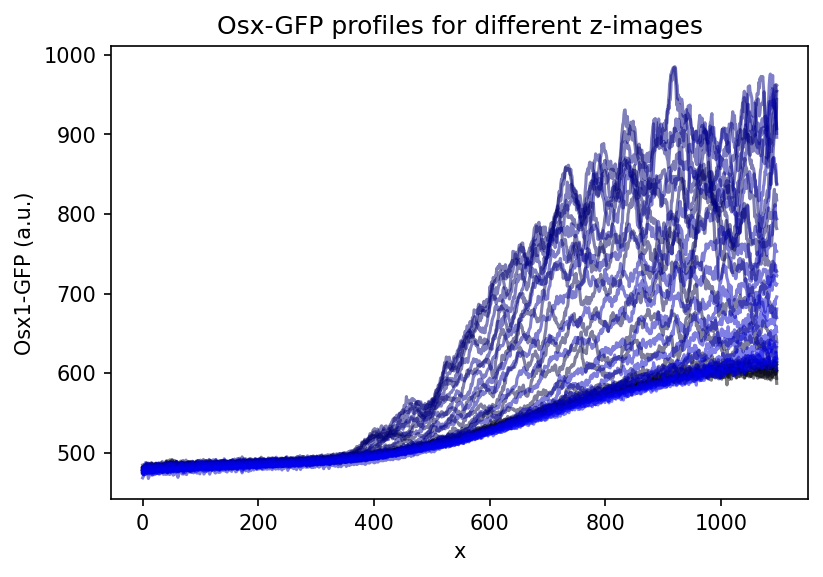

In [109]:
z_range = np.arange(0, nslices, 2);

plt.subplots(dpi=150)
plt.title('Osx-GFP profiles for different z-images')
for i in z_range:
    plt.plot(intensity_trimmed[i, :],  color=[0, 0, i/nslices, 0.5] )
plt.xlabel('x')
plt.ylabel('Osx1-GFP (a.u.)')


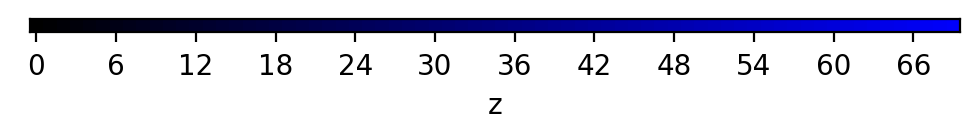

In [113]:
#manually make colorbar
colors_all = np.array([[[0, 0, t/nslices] for t in range(nslices)]]);

plt.figure(dpi=200)
plt.imshow(colors_all)
plt.xlabel('z')
plt.yticks([])
x_ticks = range(0, nslices, 6);
#x_tick_labels = [str(int(t/6)) for t in t_selected];
plt.xticks(ticks=x_ticks) #, labels=x_tick_labels)

# Save colorbar
#plt.savefig( os.path.join(save_folder_figures,'colorbar_green_times.pdf') )

plt.show();

<b>Observation</b>: Front profile and location vary across z. From the second plot, it is visible that there is some variation in profiles even after normalizing by the maximum GFP intensity of each profile.

## Plot GFP profiles vs z

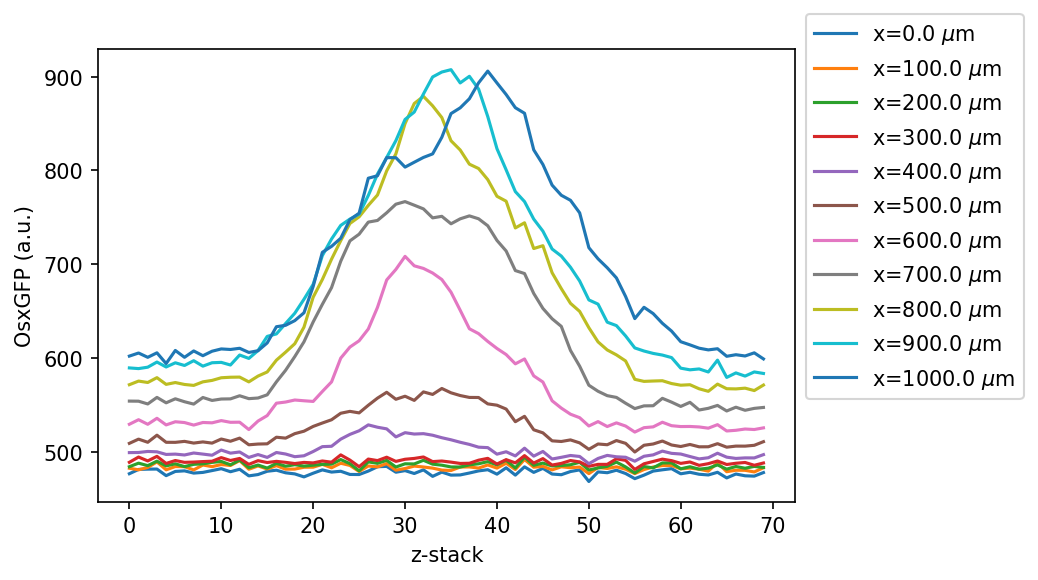

In [86]:
fig_z_profiles = plt.figure(dpi=150);
x_range = np.arange(0, ndatapoints, 100);
for i in x_range:
    plt.plot(intensity_trimmed[:, i], label='x='+str(round(i/pix_per_micron, 1))+' $\mu$m')
plt.xlabel('z-stack')
plt.ylabel('OsxGFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))

<b>Note</b>:
Maximum GFP intensity across all z-stack images roughly constant with x-positions.

# Max projection

In [3]:
from skimage import io

image_to_load = "/Users/dang/Documents/Projects/Tabler_skull/Data_BAPN/MAX_PHD_Tabler_BAPN_E140_DAPI_osx_phal647_YD.tif"

# Load image
img = io.imread(image_to_load)

In [4]:
img.shape

(1445, 1445, 3)

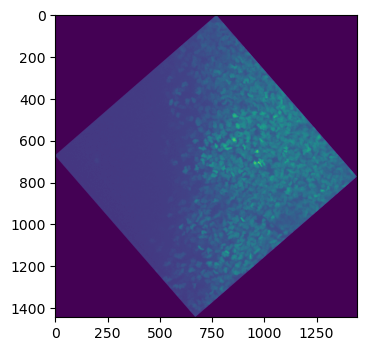

In [5]:
# Using matplotlib imshow
plt.figure(dpi=100)
plt.imshow( img[:,:,1] )
plt.show()

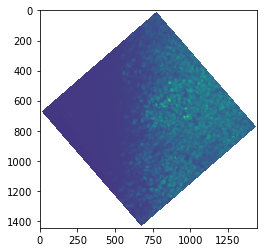

In [6]:
# try for single image
tmp=img[:,:,1].copy().astype(float)
tmp[tmp==0] = np.ones( np.sum(tmp==0) )*np.nan # set all 0's to NaN

plt.imshow(tmp)

In [7]:
# Load WT data
path = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Adrian_270120/Data_profiles/";
fname_in = "Profile_OsxGFP_max_projection.csv";
mydata = pd.read_csv(path+fname_in, header = None)
avg_gfp_wt = np.asarray(mydata[1][1:]);
avg_gfp_wt[avg_gfp_wt == ''] = 0.0
avg_gfp_wt = avg_gfp_wt.astype(np.float) # convert into np array with floats
xvals_wt = np.linspace(0, 593.640, len(avg_gfp_wt))


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_86622/3403811419.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  avg_gfp_wt = avg_gfp_wt.astype(np.float) # convert into np array with floats


/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_86622/329340181.py:4: RuntimeWarning: Mean of empty slice
  avg_gfp = np.nanmean(tmp, axis=0)[xrange[0]:xrange[1]]
/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_86622/329340181.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/8z/k5cyvf4j5kl0mzc9vn1gf_2h0000gq/T/ipykernel_86622/329340181.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


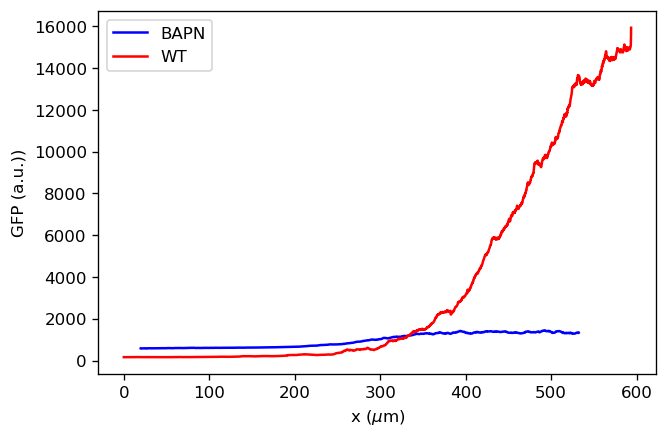

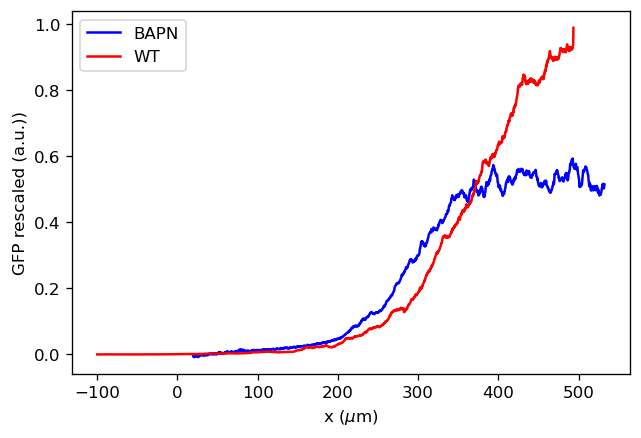

In [10]:
xrange = [50, -100]
x_vals = np.linspace(xrange[0], img.shape[1]+xrange[1], img.shape[1] + xrange[1]-xrange[0])*Lx/img.shape[1]

avg_gfp = np.nanmean(tmp, axis=0)[xrange[0]:xrange[1]]

# raw data
fig, ax = plt.subplots(dpi=120)
ax.plot(x_vals, avg_gfp, 'b-')
ax.plot(xvals_wt, avg_gfp_wt, 'r-')
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('GFP (a.u.))')
#ax.set_ylabel('GFP/max(GFP) (a.u.))')
ax.legend(['BAPN', 'WT'])
fig.show()

# rescale values
avg_gfp_rs = avg_gfp/max(avg_gfp);
avg_gfp_rs = avg_gfp_rs - np.mean(avg_gfp_rs[:100])
avg_gfp_wt_rs = avg_gfp_wt/max(avg_gfp_wt);
avg_gfp_wt_rs = avg_gfp_wt_rs - np.mean(avg_gfp_wt_rs[:100])
xvals_wt_rw = xvals_wt - 100;

fig, ax = plt.subplots(dpi=120)
ax.plot(x_vals, avg_gfp_rs, 'b-')
ax.plot(xvals_wt_rw, avg_gfp_wt_rs, 'r-')
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('GFP rescaled (a.u.))')
#ax.set_ylabel('GFP/max(GFP) (a.u.))')
ax.legend(['BAPN', 'WT'])

fig.show()

## Roughness

### Load interface as saved ROI (not useful)

In [16]:
# Load Fiji data
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_BAPN/Interface_thresholds/";

import glob
files=glob.glob(data_path+"*.txt")

In [25]:
fname_in = files[0]
data_interface = pd.read_csv(fname_in, header = None, delimiter='\t');
size = [571.15, 571.15]

data_interface

,0,1
0,512.2530,238.3399
1,512.6482,238.3399
2,512.6482,239.1304
3,513.0435,239.1304
4,513.0435,239.5257
...,...,...
15475,511.4625,237.1542
15476,511.4625,237.5494
15477,511.8577,237.5494
15478,511.8577,237.9447


Interface length L = 526.087 microns


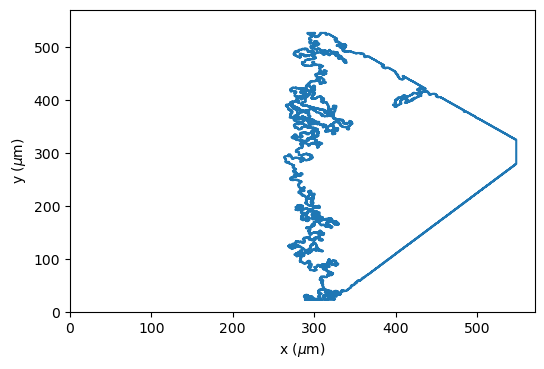

In [26]:
# remove non-interface boundaries of selected area
ymax = max(data_interface[1]);
ymin = min(data_interface[1]);
xmax = max(data_interface[0]);

# total length of interface (store for later)
L = ymax-ymin;
print("Interface length L = " + str(L) + " microns")

# margins for cutting out the three non-interface edges
margins = np.array([10, 10, 20]); # margins around edges
cond = ~(((round(data_interface[1])>=round(ymax)-margins[0]) | 
          (round(data_interface[1])<= round(ymin)+margins[1]) | 
          (round(data_interface[0])>=round(xmax)-margins[2])));

# slice data
mydata_interface_0 = data_interface[:][cond];

# Plot interface
h = plt.figure(1, dpi = 100);
p1 = plt.plot(mydata_interface_0[0], mydata_interface_0[1]);
plt.xlabel('x ($\mu$m)')
plt.ylabel('y ($\mu$m)')
plt.xlim(0, size[0])
plt.ylim(0, size[1])
#plt.title("Tolerance = " + str(tolerance) + ", selection " + str(sample))
#plt.title("Threshold auto, removed outliers radius=20")

# Save image
#fname_out = save_folder + label_0 + "interface_profile_tolerance_" + str(tolerance) + "_sample_" + str(sample);
#ext = ".png";
#fname_out = save_folder + im_label + label_0;
#plt.savefig(fname_out + ext)

plt.show()

### Load interface as binary picture

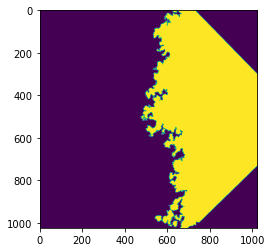

In [41]:
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_BAPN/Interface_thresholds/"
filename = "Masked_interface_binary.tif"

data_image=mpimg.imread(data_path+filename)[:,:,0]
#data_image = pd.read_csv(data_path+filename, header = None, delimiter='\t');

plt.imshow(data_image)

In [43]:
data_image[data_image == 255] = 1; # convert to 0/1    
data_image = pd.DataFrame(data_image)

interface = np.array(data_image.idxmax(axis=1), dtype=float); # find (first) index of max. of data frame

# Check that none of the rows has only 0 or 1:
if len(interface[interface == 0])==0:
    print("No empty/full rows")
else:
    print("Empty/full rows detected!") 
    # post-processing: delete empty/full rows
    mask = np.array(interface == 0, dtype=bool);
    interface[mask] = np.nan; # remove bad rows

No empty/full rows


(0.0, 404.7430830039526)

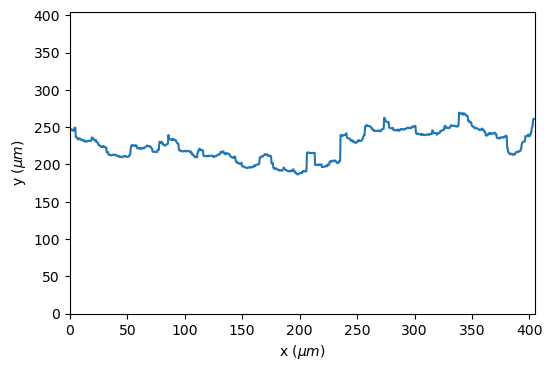

In [48]:
# Plot interface
# settings
Lx = data_image.shape[1]
Ly = data_image.shape[0]
y_vals = np.arange(Ly);
ylims = [5, -20]

h = plt.figure(dpi = 100);
plt.plot(y_vals/pix_per_micron, interface/pix_per_micron)
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
plt.xlim(0, Lx/pix_per_micron)
plt.ylim(0, Ly/pix_per_micron)


### Calculate roughness

 Calculate relevant length scale. 
 
 Relate $k$ to real length scale. For FFT, the decomposition is made up of waves of the form $e^{-i 2\pi k n/N}$. The length scale in the discrete set of values is then $N/k$, the typical distance between two values $L/N$, so the length scale in real space is $L/k$, where $L$ is the total length of the system.
<br>

So let $k_c = L/L_c$ be the critical value of $k$ corresponding to a critical length scale $L_c$ corresponding to the size of a cell.

In [95]:
Lc = 10*pix_per_micron; # cell size in pixels
L = Ly # picture size in pixels
kc = L/Lc

In [71]:
from numpy import fft
h_all = interface[~np.isnan(interface)]; # filter out nan
S = np.real(fft.fft(h_all)*fft.ifft(h_all)); # h(-k) obtained from inverse FFT
S

array([3.33445860e+08, 7.72002262e+05, 1.91191776e+05, ...,
       2.98460642e+04, 1.91191776e+05, 7.72002262e+05])

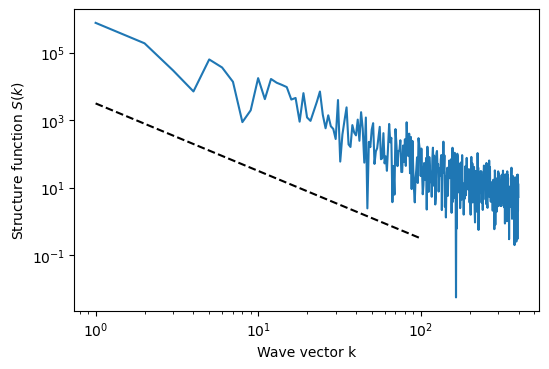

In [91]:
# Plot structure factor
kmin = 1;
kmax = 400;

plt.figure(dpi=100)
plt.plot(np.arange(kmin, kmax), S[kmin:kmax] )  

# Plot power laws 
k_range = 10**np.arange(0, 3);
alpha_plot = 0.5;
exponent = -(2*alpha_plot+1);
c = (10**3.5)
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
#plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
#plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

#plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+str(video_idx+1)+'_alpha_0p5_line.pdf' ) )

plt.show()

In [78]:
# Bin data 
def bin_data(data, binsize):
    # bins the data, adds cells to the last bin to match size and then take avg over each bin
    
    nbins = int(np.ceil(data.shape[0]/binsize));
    value_impute = np.mean( data[ binsize*(nbins-1): ]  ) # fill extra bins with value_impute
    n_add = binsize*(nbins) - data.shape[0]; # number of elements to add 

    if n_add>0:    
        data = np.concatenate((data, value_impute*np.ones(n_add)))

    return list(map(np.mean, data.reshape([nbins, binsize]) ))

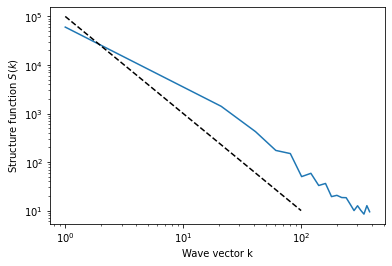

In [93]:
# Plot binned data
#video_idx = 1;
binsize = 20;
        
xdata_plot = (np.arange(kmin/binsize, kmax/binsize)*binsize);
ydata_plot = bin_data( S[kmin:kmax] , binsize )

#plt.plot( this_S_all_t[t, :], color=[0, t/t_max, 0, 0.5] )  
plt.plot(xdata_plot, ydata_plot )  
        
# Plot power laws 
k_range = 10**np.arange(0, 3);
alpha_plot = 0.5;
exponent = -(2*alpha_plot+1);
c = (10**5)
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
# plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
# plt.text(10**(1), 10**(-0.5), 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wave vector k')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

#plt.savefig( os.path.join(save_folder_figures, 'Interface_structure_function_Video_'+
#                          str(video_idx+1)+'_alpha_0p5_binsize_'+str(binsize)+'_line.pdf' ) )

plt.show()

### Fit linear model on log-log data
Not the best method, but works for now

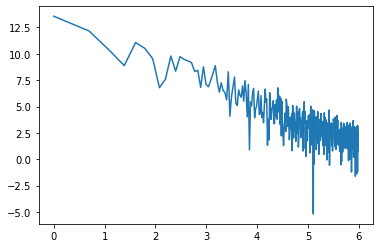

In [80]:
# data_fit
x_data = np.log( np.arange(kmin, kmax) );
y_data = np.log( S[kmin:kmax] );
plt.plot(x_data, y_data )

In [81]:
import statsmodels.api as sm
x_data = sm.add_constant(x_data)
model = sm.OLS(y_data,x_data)
results = model.fit()

roughness = (-results.params[1]-1)/2;
print('Fit parameters:', results.params )
print('Roughness = ', roughness ) # Recalculate alpha from fit 

Fit parameters: [12.90374364 -1.92371279]
Roughness =  0.4618563954830628


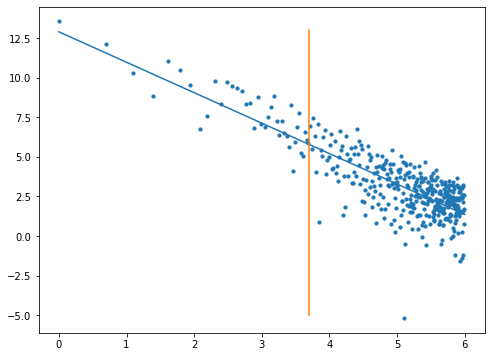

In [97]:
# Plot fit
x_fit = np.arange(0, 7);
y_fit = results.params[0] + results.params[1]*x_fit

plt.figure(figsize=(8, 6));
plt.plot(x_fit, y_fit)
plt.plot(np.log([kc, kc]), [-5, 13])
plt.scatter(x_data[:, 1], y_data, s=10 )
plt.show()

In [86]:
roughness

0.4618563954830628

In [88]:
df = pd.DataFrame([], columns=["alpha"])
df.loc["MAX_proj"] = roughness

# tidy data
# df=(df.stack()
#  .rename_axis(index = ['t','Video'])
#  .rename('alpha')
#  .reset_index()
#  #.reindex(columns = ['t','Video','alpha']))
# )
# # df['hours'] = df['t']/6;
df

,alpha
MAX_proj,0.461856
